In [1]:
import os
import SimpleITK
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def elastic_transform(image, alpha, sigma):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
       Based on gist https://gist.github.com/erniejunior/601cdf56d2b424757de5
       
       
    Parameters
    ----------
    image : np.ndarray
        image to be deformed
    alpha : list
        scale of transformation for each dimension
        larger values have more deformation
    sigma : list
        Gaussian window of deformation for each dimension
        smaller values have more localised deformation
        
    Returns
    -------
    np.ndarray
        deformed image
        
    """

    assert len(alpha) == len(sigma) , "Dimensions of alpha and sigma are different"
    
    channelbool = image.ndim - len(alpha)
    out = np.zeros( (len(alpha)+channelbool,) + image.shape )
 
    # Generate gausian filter, leaving channel dimensions zero
    for jj in range(len(alpha)):
        array = (np.random.rand(*image.shape) * 2 - 1)
        out[jj] = gaussian_filter(array, sigma[jj], mode="constant", cval=0) * alpha[jj]
        
    # Map mask to indices
    shapes = list(map( lambda x: slice(0, x, None), image.shape ) )
    grid = np.broadcast_arrays(*np.ogrid[ shapes ] )
    indices = list( map((lambda x:  np.reshape( x , (-1, 1)) ), grid + np.array(out) ) )
  
    # Transform image based on masked indices
    transformed_image = map_coordinates(image, indices, order=1,
                                        mode='reflect').reshape(image.shape)

    return transformed_image

In [3]:
filenameT1 =  "./patient_109_mr_T1.mhd"
#filenameT1 =  "patient_109_mr_T1.mhd"
nda = SimpleITK.GetArrayFromImage(SimpleITK.ReadImage(filenameT1))
nda[::10,:,:] = 4000
nda[:,::20, :] = 4000
nda[:, :,::20] = 4000
# Change axes to get [x,y,z]
nda2 = nda.swapaxes(0,2).swapaxes(0,1) 
print (nda.shape)
print (nda2.shape)

(52, 256, 256)
(256, 256, 52)


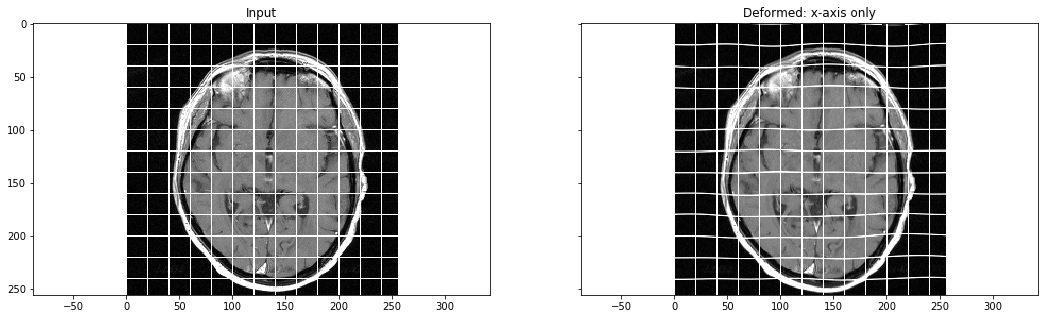

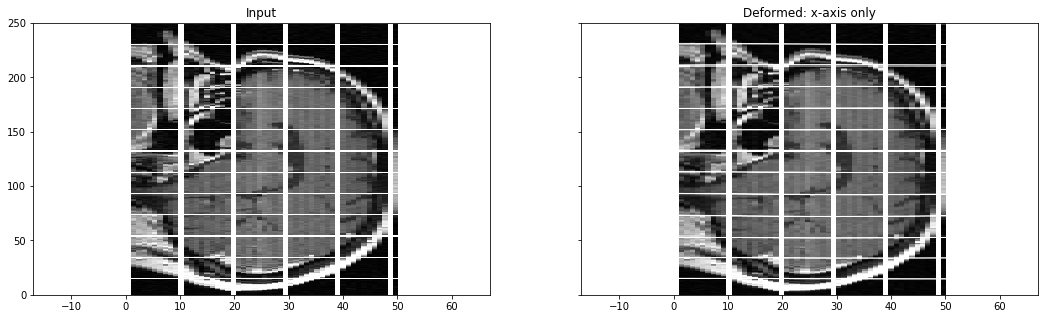

In [4]:
a = 1000
s =20
alpha = [a, 0, 0]
sigma = [s]*3

ti = elastic_transform(nda2, alpha, sigma )

plt.set_cmap("gray")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(18, 5)
ax1.imshow(nda2[:,:,25],interpolation=None, vmin=0, vmax=3000)
ax1.set_title('Input')
ax2.imshow(ti[:,:,25],interpolation=None, vmin=0, vmax=3000)
ax2.set_title('Deformed: x-axis only')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(18 ,5)
ax1.imshow(nda2[:,125,:],interpolation=None, vmin=0, vmax=3000,extent=[0,50,0,250])
ax1.set_title('Input')
ax1.set_aspect(0.2)
ax2.imshow(ti[:,125,:],interpolation=None, vmin=0, vmax=3000,extent=[0,50,0,250])
ax2.set_title('Deformed: x-axis only')
ax2.set_aspect(0.2)

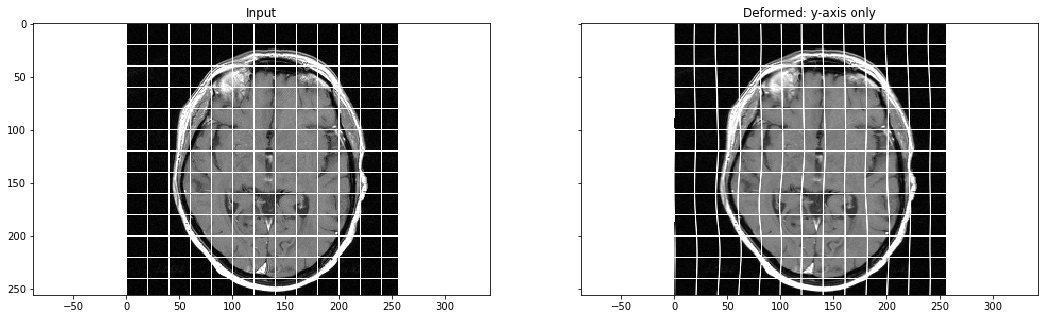

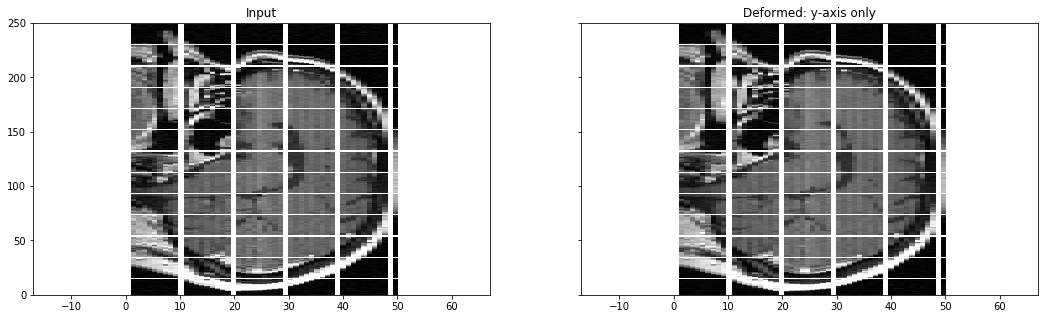

In [5]:
a = 1000
s =20
alpha = [0, a, 0]
sigma = [s]*3

ti = elastic_transform(nda2, alpha, sigma )

plt.set_cmap("gray")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(18, 5)
ax1.imshow(nda2[:,:,25],interpolation=None, vmin=0, vmax=3000)
ax1.set_title('Input')
ax2.imshow(ti[:,:,25],interpolation=None, vmin=0, vmax=3000)
ax2.set_title('Deformed: y-axis only')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(18 ,5)
ax1.imshow(nda2[:,125,:],interpolation=None, vmin=0, vmax=3000,extent=[0,50,0,250])
ax1.set_title('Input')
ax1.set_aspect(0.2)
ax2.imshow(ti[:,125,:],interpolation=None, vmin=0, vmax=3000,extent=[0,50,0,250])
ax2.set_title('Deformed: y-axis only')
ax2.set_aspect(0.2)

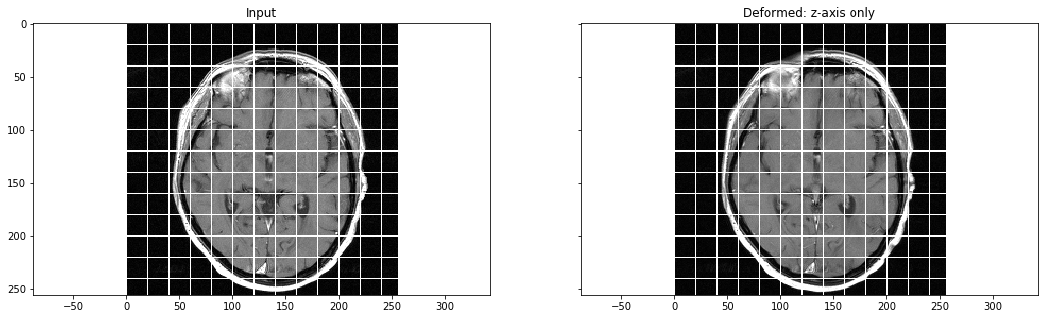

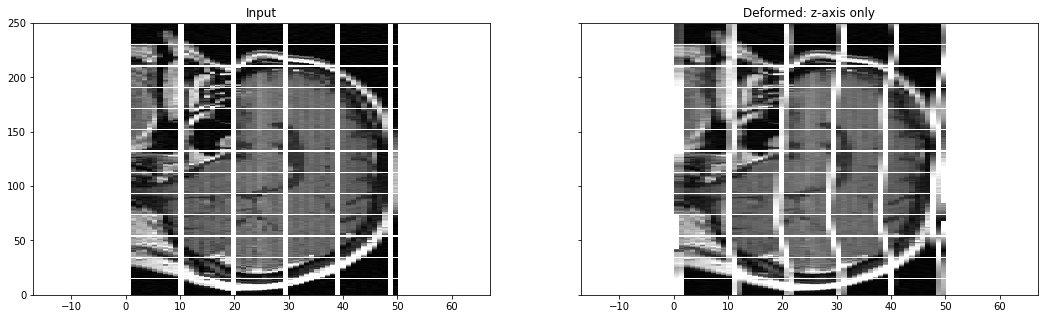

In [6]:
a = 1000
s =20
alpha = [0, 0, a]
sigma = [s]*3

ti = elastic_transform(nda2, alpha, sigma )

plt.set_cmap("gray")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(18, 5)
ax1.imshow(nda2[:,:,25],interpolation=None, vmin=0, vmax=3000)
ax1.set_title('Input')
ax2.imshow(ti[:,:,25],interpolation=None, vmin=0, vmax=3000)
ax2.set_title('Deformed: z-axis only')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(18 ,5)
ax1.imshow(nda2[:,125,:],interpolation=None, vmin=0, vmax=3000,extent=[0,50,0,250])
ax1.set_title('Input')
ax1.set_aspect(0.2)
ax2.imshow(ti[:,125,:],interpolation=None, vmin=0, vmax=3000,extent=[0,50,0,250])
ax2.set_title('Deformed: z-axis only')
ax2.set_aspect(0.2)